### **1. 폰트 설정**

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,991 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123632 files and dire

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 바른고딕 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# Matplotlib에 폰트 설정
plt.rc('font', family=font_name)

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("설정된 폰트:", font_name)

설정된 폰트: NanumBarunGothic


### **2. kaggle에서 xml 파일, 이미지 불러오기**

In [3]:
!pip install kagglehub    #kagglehub : kaggle 플랫폼 상의 모든 데이터 리소스를 다룰 수 있는 python 라이브러리

In [4]:
# 라이브러리 임포트 (xml 파일 읽기 및 사진 보기)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

In [5]:
# KaggleHub 설치
!pip install kagglehub

# Kaggle 인증 파일 업로드
from google.colab import files
files.upload()  # kaggle.json 파일 업로드, kaggle.json : kaggle의 데이터 리소스에 접근하기 위한 인증 파일

# Kaggle API 키 설정
import os                                       #운영체제 상호작용
os.makedirs("/root/.kaggle", exist_ok=True)     #kaggle API가 인증정보를 찾는 기본 경로가 저장되어 있는 디렉토리 생성, 해당 디렉토리가 있어도 상관없다
!cp kaggle.json /root/.kaggle/                  #colab의 json 파일을 미리 설정한 디렉터리에 저장함
os.chmod("/root/.kaggle/kaggle.json", 600)      #권한 설정

# KaggleHub 임포트
import kagglehub

# 데이터셋 다운로드
path = kagglehub.dataset_download("andrewmvd/face-mask-detection")    #데이터셋이 다운로드된 위치 저장

# 다운로드 위치 출력
print("Path to dataset files:", path)

Saving kaggle.json to kaggle.json


100%|██████████| 398M/398M [00:06<00:00, 65.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1


In [6]:
# XML 파일 읽기
base_path = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/annotations/"   #데이터셋의 annotations 폴더를 가리키는 위치
xml_file = "maksssksksss100.xml"    #읽고자 하는 XML 파일의 이름을 문자열로 저장,xml 파일은 이미지와 관련된 주석 정보를 담고 있다~

# 파일 경로 확인 및 읽기
file_path = os.path.join(base_path, xml_file)     #폴더 경로와 파일 이름을 결합하여 xml 파일 경로 저장

with open(file_path, 'r') as f:   #전체 경로에 해당하는 파일을 읽어서 변수 f에 저장
    contents = f.read()           #contents에 저장
    print("XML 파일 내용:")
    print(contents)               #xml 파일을 출력

XML 파일 내용:

<annotation>
    <folder>images</folder>
    <filename>maksssksksss100.png</filename>
    <size>
        <width>400</width>
        <height>226</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>189</xmin>
            <ymin>30</ymin>
            <xmax>245</xmax>
            <ymax>88</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>387</xmin>
            <ymin>54</ymin>
            <xmax>400</xmax>
            <ymax>75</ymax>
        </bndbox>
    </object>
    <object>
        <name>with_mask</name>
        <pose>Unspecified</pose>
        <truncated

사진 확인하기


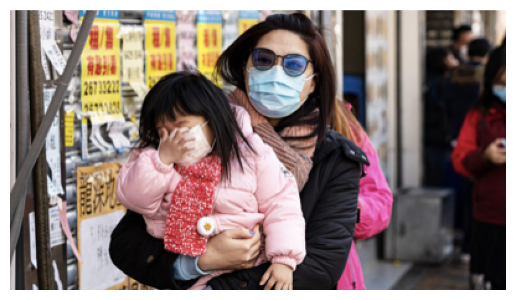

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# 이미지 파일 경로 설정
image_path = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images/maksssksksss100.png"

# 이미지 열기
print("사진 확인하기")
img = Image.open(image_path)

# Colab에서 이미지를 출력하기 위해 Matplotlib 사용
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

### **모델링 : 검출과 분류**

# Step 1 : YOLO Dectection

데이터셋 구성 코드는 https://www.kaggle.com/code/ihsncnkz/face-mask-detection-with-yolov11" 에 있는 코드의 일부를 사용하였습니다.

클래스를 ["without_mask", "with_mask", "mask_weared_incorrect"] 에서 ["with_mask"] 로 줄인 이유는 YOLO의 역할은 마스크를 쓴 사람의 검출이기 때문입니다.

In [8]:
# 필요한 라이브러리 임포트
import xml.etree.ElementTree as ET

# XML파일의 바운딩 박스를 YOLO 형식으로 변환
def xml_to_yolo_bbox(bbox, w, h):
    """
    XML 형식의 바운딩 박스를 YOLO 형식으로 변환
    bbox: [xmin, ymin, xmax, ymax]
    w: 이미지 너비
    h: 이미지 높이
    """
    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h

    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h

    return [x_center, y_center, width, height]

# YOLO 바운딩 박스를 XML 형식으로 변환
def yolo_to_xml_bbox(bbox, w, h):
    """
    YOLO 형식의 바운딩 박스를 XML 형식으로 변환
    bbox: [x_center, y_center, width, height]
    w: 이미지 너비
    h: 이미지 높이
    """
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2

    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)

    return [xmin, ymin, xmax, ymax]

# 예제: XML 파일에서 바운딩 박스 정보 읽기 및 변환
def process_xml_file(xml_file_path):
    """
    XML 파일에서 바운딩 박스 정보를 읽고 YOLO 형식으로 변환한 뒤 다시 XML 형식으로 복원
    """
    # XML 파일 파싱
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # 이미지 크기 정보 추출
    size = root.find("size")
    img_width = int(size.find("width").text)
    img_height = int(size.find("height").text)

    # 객체(object) 정보 추출
    for obj in root.findall("object"):
        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)

        # 원래 XML 바운딩 박스 출력
        xml_bbox = [xmin, ymin, xmax, ymax]
        print("Original XML BBox:", xml_bbox)

        # YOLO 형식으로 변환
        yolo_bbox = xml_to_yolo_bbox(xml_bbox, img_width, img_height)
        print("YOLO BBox:", yolo_bbox)

        # 다시 XML 형식으로 복원
        restored_xml_bbox = yolo_to_xml_bbox(yolo_bbox, img_width, img_height)
        print("Restored XML BBox:", restored_xml_bbox)

# Colab 환경에서 사용할 예제 경로 설정
xml_file_path = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/annotations/maksssksksss100.xml"

# 실제 함수 호출 및 실행
process_xml_file(xml_file_path)

Original XML BBox: [189, 30, 245, 88]
YOLO BBox: [0.5425, 0.2610619469026549, 0.14, 0.25663716814159293]
Restored XML BBox: [189, 30, 245, 88]
Original XML BBox: [387, 54, 400, 75]
YOLO BBox: [0.98375, 0.2853982300884956, 0.0325, 0.09292035398230089]
Restored XML BBox: [387, 54, 400, 75]
Original XML BBox: [118, 87, 163, 126]
YOLO BBox: [0.35125, 0.47123893805309736, 0.1125, 0.17256637168141592]
Restored XML BBox: [118, 87, 163, 126]


In [9]:
# 클래스 리스트 초기화
classes = []

# Colab 환경에서 사용할 디렉토리 설정
os.makedirs('result/labels', exist_ok=True)           #현재 작업 디렉토리에 result 폴더, labels 하위 폴더 생성
input_dir = '/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/annotations'    #데이터셋의 anootations폴더의 xml파일들이 저장된 디렉토리의 경로 저장
output_dir = 'result/labels'                                                                          #result/labels 경로 저장
image_dir = '/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images'         #데이터셋의 images폴더의 png파일들이 저장된 디렉토리의 경로 저장

# 출력 디렉토리 확인 및 생성
if not os.path.exists(output_dir):            # result/labels 경로가 없다면 디렉토리 생성
    os.mkdir(output_dir)

# XML 파일 처리 및 YOLO 형식으로 변환
files = glob.glob(os.path.join(input_dir, '*.xml')) #input_dir 변수와 각각의 xml 파일의 이름을 조합하여 최종 경로 패턴 생성 / 경로 패턴과 같은 파일들을 찾아 files에 저장
for fil in files:   #fil : files 리스트의 각각의 xml파일에 대한 경로
    basename = os.path.basename(fil)       #for문 활용하여 files 리스트의 모든 파일 경로에서 파일 이름만 추출
    filename = os.path.splitext(basename)[0]      #.xml 삭제, xml 파일의 이름만 남김

    # xml 파일에 대응되는 이미지 파일 존재 여부 확인
    if not os.path.exists(os.path.join(image_dir, f'{filename}.png')):
        print(f'{filename} image does not exist')
        continue

    # result 리스트 생성
    result = []

    # XML 파일 파싱
    tree = ET.parse(fil)      #parse 함수를 활용하여 XML 파일의 파싱 결과를 tree 변수에 저장, tree는 파싱된 xml 문서 전체를 나타내는 트리 구조이다.
    root = tree.getroot()     #getroot 함수를 활용하여 xml 파일의 최상위 요소를 root 변수에 저장
    width = int(root.find('size').find('width').text)       #find 함수를 활용하여 root의 size, width 하위 요소 탐색, width 요소의 text 값 추출
    height = int(root.find('size').find('height').text)     #find 함수를 활용하여 root의 size, height 하위 요소 탐색, height 요소의 text 값 추출

    # 객체 정보 추출 및 변환
    for obj in root.findall('object'):          # 여러 object 요소를 찾기 때문에 for 반복문 사용
        label = obj.find('name').text           # object 요소의 name text값을 추출하고 label에 저장 / label : object의 이름

        if label not in classes:
            classes.append(label)               # classes 리스트에 label을 추가하여 저장

        index = classes.index(label)            # 순서대로 index를 0, 1, 2, ...... 설정
        pil_bbox = [int(x.text) for x in obj.find('bndbox')]      #현재 객체의 바운딩 박스를 PIL 형식으로 추출하여 pil_bbox 리스트에 저장
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)     #추출한 바운딩 박스를 yolo 형식에 맞추어 저장

        bbox_string = ' '.join([str(x) for x in yolo_bbox])       #yolo_bbox의 값들을 공백 없는 문자열로 만들어서 저장
        result.append(f'{index} {bbox_string}')                   #index와 bbox_string을 하나의 문자열로 연결하여 result 리스트에 저장 / result : index, bbox 요소 저장

    # YOLO 형식 결과 저장 / 하나의 xml 파일에 대한 모든 object의 index, bbox 요소들을 filename.txt로 저장
    if result:
        with open(os.path.join(output_dir, f'{filename}.txt'), 'w', encoding='utf-8') as f:
            f.write('\n'.join(result))

# 클래스 정보 저장  / 하나의 xml 파일에 대한 모든 object의 object label 들을 classes.txt로 저장
with open(f'{output_dir}/classes.txt', 'w', encoding='utf-8') as f:
    f.write(json.dumps(classes))


#xml 파일을 yolo 형식으로 변환하고 txt파일로 저장하는 과정


print("YOLO 형식 변환 완료!")

YOLO 형식 변환 완료!


In [10]:
import os

# 클래스 구성 출력
print("클래스 구성")

# 파일 경로 설정
classes_file_path = os.path.join('result/labels', 'classes.txt')  #classes.txt의 전체 경로 저장

# 파일 존재 여부 확인 후 읽기
if os.path.exists(classes_file_path):
    with open(classes_file_path, 'r', encoding='utf-8') as f:
        contents = f.read()
        print(contents)
else:
    print(f"클래스 파일 {classes_file_path}이(가) 존재하지 않습니다.")

클래스 구성
["with_mask", "without_mask", "mask_weared_incorrect"]


In [11]:
import os

# 주석(annotation) 파일 개수 세기
annotation_dir = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/annotations"
if os.path.exists(annotation_dir):
    annotation_count = len(os.listdir(annotation_dir))
else:
    annotation_count = 0
    print(f"Annotation 디렉토리가 존재하지 않습니다: {annotation_dir}")

# YOLO 레이블 파일 개수 세기
labels_dir = "result/labels"
if os.path.exists(labels_dir):
    labels_count = len(os.listdir(labels_dir))
else:
    labels_count = 0
    print(f"Labels 디렉토리가 존재하지 않습니다: {labels_dir}")

# 결과 출력
print(f"Annotation 개수: {annotation_count}")
print(f"레벨의 수: {labels_count}")

Annotation 개수: 853
레벨의 수: 854


In [12]:
import os

# 디렉토리 생성 함수
def create_directory(path):
    if not os.path.isdir(path):
        os.makedirs(path)

# 기본 디렉토리 설정
base_dir = 'result/data'

# 디렉토리 구조 생성
create_directory(base_dir)  #result/data 디렉토리 생성
create_directory(os.path.join(base_dir, 'train/images'))
create_directory(os.path.join(base_dir, 'train/labels'))
create_directory(os.path.join(base_dir, 'val/images'))
create_directory(os.path.join(base_dir, 'val/labels'))
create_directory(os.path.join(base_dir, 'test/images'))
create_directory(os.path.join(base_dir, 'test/labels'))

# 생성된 디렉토리 구조 확인
def check_directories():
    sub_dirs = ['train', 'val', 'test']
    sub_sub_dirs = ['images', 'labels']

    for sub_dir in sub_dirs:
        for sub_sub_dir in sub_sub_dirs:
            path = os.path.join(base_dir, sub_dir, sub_sub_dir)
            print(f"{path}: {'Exists' if os.path.isdir(path) else 'Does not exist'}")

check_directories()

# 생성된 디렉토리 구조 확인
print("디렉토리 구조가 성공적으로 생성되었습니다.")

result/data/train/images: Exists
result/data/train/labels: Exists
result/data/val/images: Exists
result/data/val/labels: Exists
result/data/test/images: Exists
result/data/test/labels: Exists
디렉토리 구조가 성공적으로 생성되었습니다.


In [13]:
import os

# 이미지 파일 이름을 저장할 리스트
metarial = []

# 이미지 디렉토리 경로
image_dir = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images"

# 디렉토리 확인 및 이미지 파일 처리
if os.path.exists(image_dir):
    # 이미지 파일만 리스트에 추가 (확장자 확인)
    for i in os.listdir(image_dir):
        if i.endswith('.png') or i.endswith('.jpg') or i.endswith('.jpeg'):
            str_name = i[:-4]  # 확장자 제거
            metarial.append(str_name)
else:
    print(f"디렉토리가 존재하지 않습니다: {image_dir}")

# 리스트의 첫 10개 항목 확인
print("첫 10개의 이미지 파일 이름:", metarial[:10])

# 전체 이미지 수 출력
print("전체 이미지 수:", len(metarial))

# 데이터셋 크기 계산
train_size = int(len(metarial) * 0.7)
test_size = int(len(metarial) * 0.15)
val_size = int(len(metarial) * 0.15)

# 데이터셋 크기 출력
print("학습셋의 크기:", train_size)
print("테스트셋의 크기:", test_size)
print("검증셋의 크기:", val_size)

첫 10개의 이미지 파일 이름: ['maksssksksss656', 'maksssksksss850', 'maksssksksss756', 'maksssksksss682', 'maksssksksss801', 'maksssksksss423', 'maksssksksss579', 'maksssksksss414', 'maksssksksss372', 'maksssksksss279']
전체 이미지 수: 853
학습셋의 크기: 597
테스트셋의 크기: 127
검증셋의 크기: 127


In [14]:
import os
import shutil

# YOLO 학습을 위한 데이터셋 구성 함수
def prepare_data(main_txt_file, main_img_file, train_size, test_size, val_size, metarial):
    """
    YOLO 학습을 위한 데이터셋을 학습(train), 테스트(test), 검증(val) 세트로 분할하여 저장하는 함수.

    Args:
        main_txt_file (str): 라벨 파일(.txt)이 저장된 디렉토리 경로.
        main_img_file (str): 이미지 파일(.png)이 저장된 디렉토리 경로.
        train_size (int): 학습 데이터셋의 크기.
        test_size (int): 테스트 데이터셋의 크기.
        val_size (int): 검증 데이터셋의 크기.
        metarial (list): 이미지와 라벨 파일 이름(확장자 제외)의 리스트.
    """
    # 디렉토리 구조 생성
    os.makedirs('result/data/train/labels', exist_ok=True)
    os.makedirs('result/data/train/images', exist_ok=True)
    os.makedirs('result/data/test/labels', exist_ok=True)
    os.makedirs('result/data/test/images', exist_ok=True)
    os.makedirs('result/data/val/labels', exist_ok=True)
    os.makedirs('result/data/val/images', exist_ok=True)

    # 학습 데이터 복사
    for i in range(0, train_size):
        source_txt = os.path.join(main_txt_file, f"{metarial[i]}.txt")
        source_img = os.path.join(main_img_file, f"{metarial[i]}.png")

        train_destination_txt = os.path.join("result/data/train/labels", f"{metarial[i]}.txt")
        train_destination_png = os.path.join("result/data/train/images", f"{metarial[i]}.png")

        if os.path.exists(source_txt) and os.path.exists(source_img):
            shutil.copy(source_txt, train_destination_txt)
            shutil.copy(source_img, train_destination_png)

    # 테스트 데이터 복사
    for l in range(train_size, train_size + test_size):
        source_txt = os.path.join(main_txt_file, f"{metarial[l]}.txt")
        source_img = os.path.join(main_img_file, f"{metarial[l]}.png")

        test_destination_txt = os.path.join("result/data/test/labels", f"{metarial[l]}.txt")
        test_destination_png = os.path.join("result/data/test/images", f"{metarial[l]}.png")

        if os.path.exists(source_txt) and os.path.exists(source_img):
            shutil.copy(source_txt, test_destination_txt)
            shutil.copy(source_img, test_destination_png)

    # 검증 데이터 복사
    for n in range(train_size + test_size, train_size + test_size + val_size):
        source_txt = os.path.join(main_txt_file, f"{metarial[n]}.txt")
        source_img = os.path.join(main_img_file, f"{metarial[n]}.png")

        val_destination_txt = os.path.join("result/data/val/labels", f"{metarial[n]}.txt")
        val_destination_png = os.path.join("result/data/val/images", f"{metarial[n]}.png")

        if os.path.exists(source_txt) and os.path.exists(source_img):
            shutil.copy(source_txt, val_destination_txt)
            shutil.copy(source_img, val_destination_png)

    print("데이터셋 준비가 완료되었습니다!")

# 함수 호출 예시
main_txt_file = "result/labels"  # 라벨 파일 경로
main_img_file = "/root/.cache/kagglehub/datasets/andrewmvd/face-mask-detection/versions/1/images"  # 이미지 파일 경로

# metarial 리스트는 이전 코드에서 생성된 리스트를 사용합니다.
# 예: metarial = ['image1', 'image2', 'image3', ...]
# metarial 리스트는 전체 이미지 파일 이름(확장자 제외)을 포함합니다.

train_size = int(len(metarial) * 0.7)
test_size = int(len(metarial) * 0.15)
val_size = len(metarial) - train_size - test_size  # 나머지 데이터를 검증 세트로 사용

prepare_data(main_txt_file, main_img_file, train_size, test_size, val_size, metarial)

# YAML 파일 구성
yaml_text = """train: /content/result/data/train/images/
val: /content/result/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]"""

# YAML 파일 생성
os.makedirs("result/data", exist_ok=True)
with open("result/data/data.yaml", 'w') as file:
    file.write(yaml_text)

# YAML 파일 내용 출력
with open("result/data/data.yaml") as f:
    contents = f.read()
    print(contents)

데이터셋 준비가 완료되었습니다!
train: /content/result/data/train/images/
val: /content/result/data/val/images/

nc: 3
names: ["with_mask", "mask_weared_incorrect", "without_mask"]


In [15]:
import os
import shutil

def filter_and_convert_labels_to_zero(label_dir, image_dir, output_label_dir, output_image_dir):
    """
    클래스 번호가 0 또는 1인 라벨만 필터링하고, 해당 라벨을 0으로 변환하며, 대응하는 이미지를 새로운 디렉토리에 복사.
    Args:
        label_dir (str): 원본 라벨 파일들이 위치한 디렉토리 경로
        image_dir (str): 원본 이미지 파일들이 위치한 디렉토리 경로
        output_label_dir (str): 필터링된 라벨 파일들을 저장할 디렉토리 경로
        output_image_dir (str): 필터링된 라벨에 해당하는 이미지를 저장할 디렉토리 경로
    """
    # 출력 디렉토리가 없으면 생성
    os.makedirs(output_label_dir, exist_ok=True)
    os.makedirs(output_image_dir, exist_ok=True)

    for label_file in os.listdir(label_dir):
        if label_file.endswith(".txt"):
            label_path = os.path.join(label_dir, label_file)

            # 파일 읽기
            with open(label_path, "r") as file:
                lines = file.readlines()

            # 클래스 번호가 0 또는 1인 데이터만 필터링하고 클래스 번호를 0으로 변환
            filtered_lines = [
                " ".join(["0"] + line.split()[1:]) + "\n"  # 클래스 번호를 0으로 변환
                for line in lines if line.split()[0] in ["0", "1"]
            ]

            # 필터링된 내용이 있을 경우 처리
            if filtered_lines:
                # 변환된 라벨 저장
                output_label_path = os.path.join(output_label_dir, label_file)
                with open(output_label_path, "w") as file:
                    file.writelines(filtered_lines)

                # 해당 이미지 파일 복사
                image_name = os.path.splitext(label_file)[0] + ".png"  # 라벨 파일 이름에서 이미지 파일 이름 생성
                image_path = os.path.join(image_dir, image_name)
                if os.path.exists(image_path):
                    shutil.copy(image_path, os.path.join(output_image_dir, image_name))

    print(f"클래스 번호가 0 또는 1인 데이터를 필터링하고, 라벨을 0으로 변환한 후 이미지를 복사했습니다.")
    print(f"라벨 디렉토리: {output_label_dir}")
    print(f"이미지 디렉토리: {output_image_dir}")

# 원본 디렉토리 설정
train_labels_dir = "/content/result/data/train/labels"
val_labels_dir = "/content/result/data/val/labels"
train_images_dir = "/content/result/data/train/images"
val_images_dir = "/content/result/data/val/images"

# 출력 디렉토리 설정
filtered_train_labels_dir = "/content/result/filtered/train/labels"
filtered_val_labels_dir = "/content/result/filtered/val/labels"
filtered_train_images_dir = "/content/result/filtered/train/images"
filtered_val_images_dir = "/content/result/filtered/val/images"

# 함수 호출
filter_and_convert_labels_to_zero(
    train_labels_dir, train_images_dir, filtered_train_labels_dir, filtered_train_images_dir
)
filter_and_convert_labels_to_zero(
    val_labels_dir, val_images_dir, filtered_val_labels_dir, filtered_val_images_dir
)

# YAML 파일 구성 및 생성
yaml_text = """train: /content/result/filtered/train/images/
val: /content/result/filtered/val/images/

nc: 1
names: ["class_0"]"""

os.makedirs("/content/result/filtered", exist_ok=True)
with open("/content/result/filtered/data.yaml", 'w') as file:
    file.write(yaml_text)

print("YAML 파일이 생성되었습니다.")

# YAML 파일 내용 출력
with open("/content/result/filtered/data.yaml") as f:
    contents = f.read()
    print(contents)

클래스 번호가 0 또는 1인 데이터를 필터링하고, 라벨을 0으로 변환한 후 이미지를 복사했습니다.
라벨 디렉토리: /content/result/filtered/train/labels
이미지 디렉토리: /content/result/filtered/train/images
클래스 번호가 0 또는 1인 데이터를 필터링하고, 라벨을 0으로 변환한 후 이미지를 복사했습니다.
라벨 디렉토리: /content/result/filtered/val/labels
이미지 디렉토리: /content/result/filtered/val/images
YAML 파일이 생성되었습니다.
train: /content/result/filtered/train/images/
val: /content/result/filtered/val/images/

nc: 1
names: ["class_0"]


In [16]:
import os

# YAML 파일 내용
yaml_text = """train: /content/result/filtered/train/images/
val: /content/result/filtered/val/images/

nc: 1
names: ["mask"]
"""

# 디렉토리 생성 (존재하지 않을 경우)
os.makedirs("result/data", exist_ok=True)

# YAML 파일 작성
yaml_file_path = "result/data/data.yaml"
with open(yaml_file_path, 'w') as file:
    file.write(yaml_text)

# YAML 파일 내용 읽기 및 출력
with open(yaml_file_path, 'r') as f:
    contents = f.read()
    print(contents)

train: /content/result/filtered/train/images/
val: /content/result/filtered/val/images/

nc: 1
names: ["mask"]



**YOLO 모델 학습 시작 (Colab Pro버전으로 진행했습니다.)**

In [17]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 18.3 MB/s eta 0:00:00


In [18]:
# 오류 발생시 최신 개발 툴 설치
!pip install git+https://github.com/ultralytics/ultralytics.git

  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-cees4ps5
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-cees4ps5
  Resolved https://github.com/ultralytics/ultralytics.git to commit 96cd3895ff44cd740fd4e088306df0a191089db5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [19]:
import torch
torch.cuda.empty_cache()

In [20]:
# 본 프로젝트에서는 YOLO 모델의 안정성을 위해 yolov10x 를 재학습 하여 사용하였습니다.
# 에포크 100으로 진행, 배치사이즈는 기본 값
from ultralytics import YOLO

model = YOLO('yolov10x.pt')

results = model.train(data="result/data/data.yaml", epochs=100, imgsz=640, batch=8, save=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 61.4M/61.4M [00:00<00:00, 74.1MB/s]


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10x.pt, data=result/data/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 20.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1    213120  ultralytics.nn.modules.block.SCDown          [320, 640, 3, 2]              
  6                  -1  6   4604160  ultralytics.nn.modules.block.C2fCIB          [640, 640, 6, True]           
  7                  -1  1    417920  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.5MB/s]


AMP: checks passed ✅


train: Scanning /content/result/filtered/train/labels... 583 images, 0 backgrounds, 0 corrupt: 100%|██████████| 583/583 [00:00<00:00, 740.67it/s]

train: New cache created: /content/result/filtered/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/result/filtered/val/labels... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 252.93it/s]

val: New cache created: /content/result/filtered/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 185 weight(decay=0.0), 198 weight(decay=0.0005), 197 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        10G      3.062      3.037      2.567         58        640: 100%|██████████| 73/73 [00:52<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        126        692    0.00607      0.262    0.00397    0.00231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.77G      3.002      2.266      2.505         66        640: 100%|██████████| 73/73 [00:52<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.33it/s]

                   all        126        692       0.16      0.377      0.089     0.0441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.83G      2.907      2.089      2.472         53        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.587       0.35      0.333      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.82G      2.988      2.121      2.504         21        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all        126        692      0.679      0.475      0.506      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.84G      2.919      2.012      2.482         93        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        126        692      0.737      0.649      0.695      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.82G      2.857      2.048       2.44         63        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        126        692      0.808      0.724      0.777      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.84G      2.676      1.771      2.354         86        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all        126        692      0.824      0.723      0.804      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.84G       2.66      1.713      2.323         62        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.835      0.752       0.81      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.81G      2.713       1.68      2.376         24        640: 100%|██████████| 73/73 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.783      0.718      0.773      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.77G      2.675      1.668      2.328         43        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        126        692      0.906      0.755      0.842      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.82G      2.666        1.6      2.348         68        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.884      0.766      0.845      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.82G      2.604      1.548      2.308         52        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        126        692      0.862       0.77      0.836      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.84G      2.592      1.531      2.312         72        640: 100%|██████████| 73/73 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        126        692      0.859      0.755      0.814      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.81G      2.509      1.419      2.218         69        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.853      0.793      0.851       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.83G      2.447      1.428      2.231         65        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]

                   all        126        692      0.894      0.777       0.86      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.83G      2.448      1.396      2.221         97        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.925      0.782      0.877      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.82G      2.444      1.363      2.243         42        640: 100%|██████████| 73/73 [00:51<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.884      0.802      0.871      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.76G      2.431      1.347      2.231         57        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        126        692      0.903      0.808      0.881      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.83G      2.479      1.352      2.182         75        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        126        692      0.883      0.825      0.889      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.83G      2.372      1.323      2.205         75        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.886      0.788      0.872      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.83G       2.41      1.315      2.226         67        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        126        692      0.896      0.822      0.892       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.83G      2.374      1.243      2.158         96        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.906      0.783       0.87       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.81G      2.311      1.232      2.197         28        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.898      0.821      0.892      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.83G      2.387      1.265      2.167         72        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        126        692       0.91      0.831      0.908      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.82G      2.299      1.169      2.144         82        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        126        692      0.908      0.817      0.895      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.82G      2.309      1.232      2.133         46        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.876      0.785      0.861      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.81G      2.362      1.209      2.162         72        640: 100%|██████████| 73/73 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.914      0.797      0.897      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.81G      2.297      1.188      2.131         80        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        126        692      0.898      0.811      0.885      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.86G      2.266      1.139      2.077         91        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all        126        692      0.914      0.831      0.895      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.83G       2.31      1.164      2.115         18        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        126        692      0.922      0.799      0.899       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.82G      2.234      1.134      2.135         43        640: 100%|██████████| 73/73 [00:51<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        126        692      0.908       0.84      0.903      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.83G      2.246      1.122      2.117         37        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        126        692      0.919      0.836      0.908      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.85G      2.169      1.075      2.096         53        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        126        692      0.898      0.844      0.905      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.79G      2.249      1.139      2.096         56        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692        0.9      0.836      0.903      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.82G       2.22       1.11      2.129         22        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.914      0.844       0.91      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.82G      2.149      1.052      2.066         34        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.904      0.825        0.9        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.81G      2.088      1.054      2.066        110        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        126        692      0.915      0.842      0.908      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.84G       2.16      1.094      2.078         31        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        126        692       0.88      0.845      0.898      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       9.8G      2.163      1.087      2.093         38        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        126        692       0.88      0.848      0.902      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.83G      2.171      1.042      2.062         35        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.912       0.86      0.914       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.82G      2.109      1.015      2.049         36        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.938      0.833       0.91      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.75G      2.086      1.032      2.073         46        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.917      0.844      0.915      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.87G      2.072      1.037       2.05         66        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]

                   all        126        692      0.923      0.847      0.915      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.81G      2.081      1.014      2.026         61        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.918      0.856      0.914      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.83G      2.068     0.9757      2.032         67        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.934      0.842      0.913      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.81G       2.06     0.9542      2.052         90        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        126        692      0.936      0.847      0.916      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.92G      2.098     0.9931      2.044        110        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        126        692      0.931      0.832      0.912      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.82G      2.037     0.9459      2.024         51        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692       0.93      0.842      0.924      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.82G      2.063     0.9353      2.029         62        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        126        692       0.92      0.848      0.915       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.79G      2.039     0.9467      1.984         43        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        126        692      0.942       0.84      0.925      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.84G      2.002     0.9134      1.976         54        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        126        692      0.904      0.851      0.913      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.84G      2.028      0.942      2.007         29        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        126        692      0.921      0.865      0.923      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.82G      1.999     0.9315      1.996         40        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        126        692      0.929       0.85      0.919      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.83G      1.961      0.929      2.009         37        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        126        692       0.92      0.852      0.919      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.84G      1.962     0.9087      1.981         61        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.945      0.845      0.922      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.82G      1.888     0.8595      1.987         44        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.87it/s]

                   all        126        692      0.941      0.831       0.92      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.83G      1.928     0.8925      1.973         34        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all        126        692       0.93      0.844       0.92      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.76G      1.934     0.8711      1.969         50        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        126        692      0.897       0.87      0.915      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.86G      1.934     0.9035      1.998         45        640: 100%|██████████| 73/73 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.902      0.862      0.922      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.82G      1.944     0.8709      1.964         68        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        126        692      0.895      0.863      0.915       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.84G      1.893     0.8539      1.959         65        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        126        692       0.93      0.858      0.927      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.81G      1.886     0.8338      1.943         80        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.934      0.854      0.921      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.96G      1.908     0.8413      1.942         74        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.935      0.836      0.921      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.82G      1.823     0.8091      1.931         66        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        126        692      0.915      0.855      0.921      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.83G      1.818     0.7977      1.905         58        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]

                   all        126        692      0.906      0.862      0.917      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.79G      1.794     0.7979      1.919         30        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.921      0.866      0.917      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.83G      1.785     0.7952      1.928         21        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.936      0.861      0.924      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.84G      1.827     0.8224      1.932         61        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        126        692      0.929      0.846      0.922      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.82G      1.777     0.7847      1.901         34        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.92it/s]

                   all        126        692      0.939      0.849      0.921      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.82G      1.817     0.8046      1.928         57        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        126        692      0.936       0.84      0.919      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.81G      1.791     0.7759      1.907         49        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        126        692      0.954      0.841      0.925      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.84G      1.779     0.7839      1.898         76        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        126        692      0.943      0.845      0.922      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.83G      1.723      0.767        1.9         42        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        126        692      0.922      0.849      0.917      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.79G      1.758     0.7575      1.914         63        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.919      0.864      0.921      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.82G      1.708     0.7483      1.883         42        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all        126        692       0.91      0.861      0.929      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.88G      1.744     0.7704      1.892         54        640: 100%|██████████| 73/73 [00:50<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        126        692      0.939      0.838       0.93       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.88G      1.681     0.7388      1.894         56        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        126        692      0.924      0.864      0.923      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.82G      1.677     0.7283      1.891         45        640: 100%|██████████| 73/73 [00:52<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]

                   all        126        692      0.923       0.86      0.924       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.84G      1.665     0.7328      1.903         47        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.86it/s]

                   all        126        692      0.949       0.84      0.923      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.89G       1.67     0.7123      1.881         63        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.923      0.862      0.922      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.81G      1.624      0.689      1.856         65        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        126        692      0.944      0.846      0.923      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.76G      1.646     0.6944       1.86         80        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.929       0.87      0.928      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.91G      1.609     0.6816      1.857         39        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        126        692      0.936      0.847      0.929      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.83G      1.614     0.6893      1.838         57        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.933      0.844      0.922      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.84G      1.594     0.6997      1.845         64        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.936      0.853      0.925      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.83G      1.607     0.6788      1.857         47        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        126        692      0.932      0.868      0.928      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.92G      1.596     0.6729      1.839         44        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        126        692      0.937      0.864      0.932      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.84G      1.546     0.6653      1.836         51        640: 100%|██████████| 73/73 [00:50<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.957      0.842      0.932      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.83G      1.483     0.6306      1.832         55        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.922      0.867      0.934      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.74G      1.525     0.6433      1.811         55        640: 100%|██████████| 73/73 [00:51<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]

                   all        126        692      0.906      0.879       0.93       0.64


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.83G      1.434     0.5621       1.81         34        640: 100%|██████████| 73/73 [00:52<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

                   all        126        692      0.944      0.845       0.93      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.86G      1.401     0.5441      1.788         15        640: 100%|██████████| 73/73 [00:50<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.929      0.855      0.924      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.81G      1.397     0.5536      1.772         13        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]

                   all        126        692      0.941      0.851      0.928       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.82G      1.365     0.5575      1.765         27        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        126        692      0.935      0.867      0.931       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       9.8G      1.389     0.5356      1.792         24        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]

                   all        126        692      0.927      0.868      0.934      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       9.8G      1.332     0.5221      1.776         19        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        126        692      0.943      0.844      0.931      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.81G      1.336     0.5203      1.773         17        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        126        692      0.925      0.858      0.932      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.75G      1.292     0.5007      1.758         29        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        126        692      0.932       0.86      0.932      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.83G      1.315     0.5068      1.774         11        640: 100%|██████████| 73/73 [00:51<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        126        692      0.925      0.869      0.932      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.83G      1.304     0.5115       1.77         13        640: 100%|██████████| 73/73 [00:51<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]

                   all        126        692      0.929      0.866      0.935      0.645



100 epochs completed in 1.684 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 64.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 64.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10x summary (fused): 503 layers, 31,586,006 parameters, 0 gradients, 169.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]


                   all        126        692      0.919      0.874      0.932      0.648


Speed: 0.3ms preprocess, 22.8ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train


In [21]:
import os

output_dir = '/content/runs/detect/'
print("Available directories:", os.listdir(output_dir))

Available directories: ['train']


YOLO 재학습 결과

PR Curve:


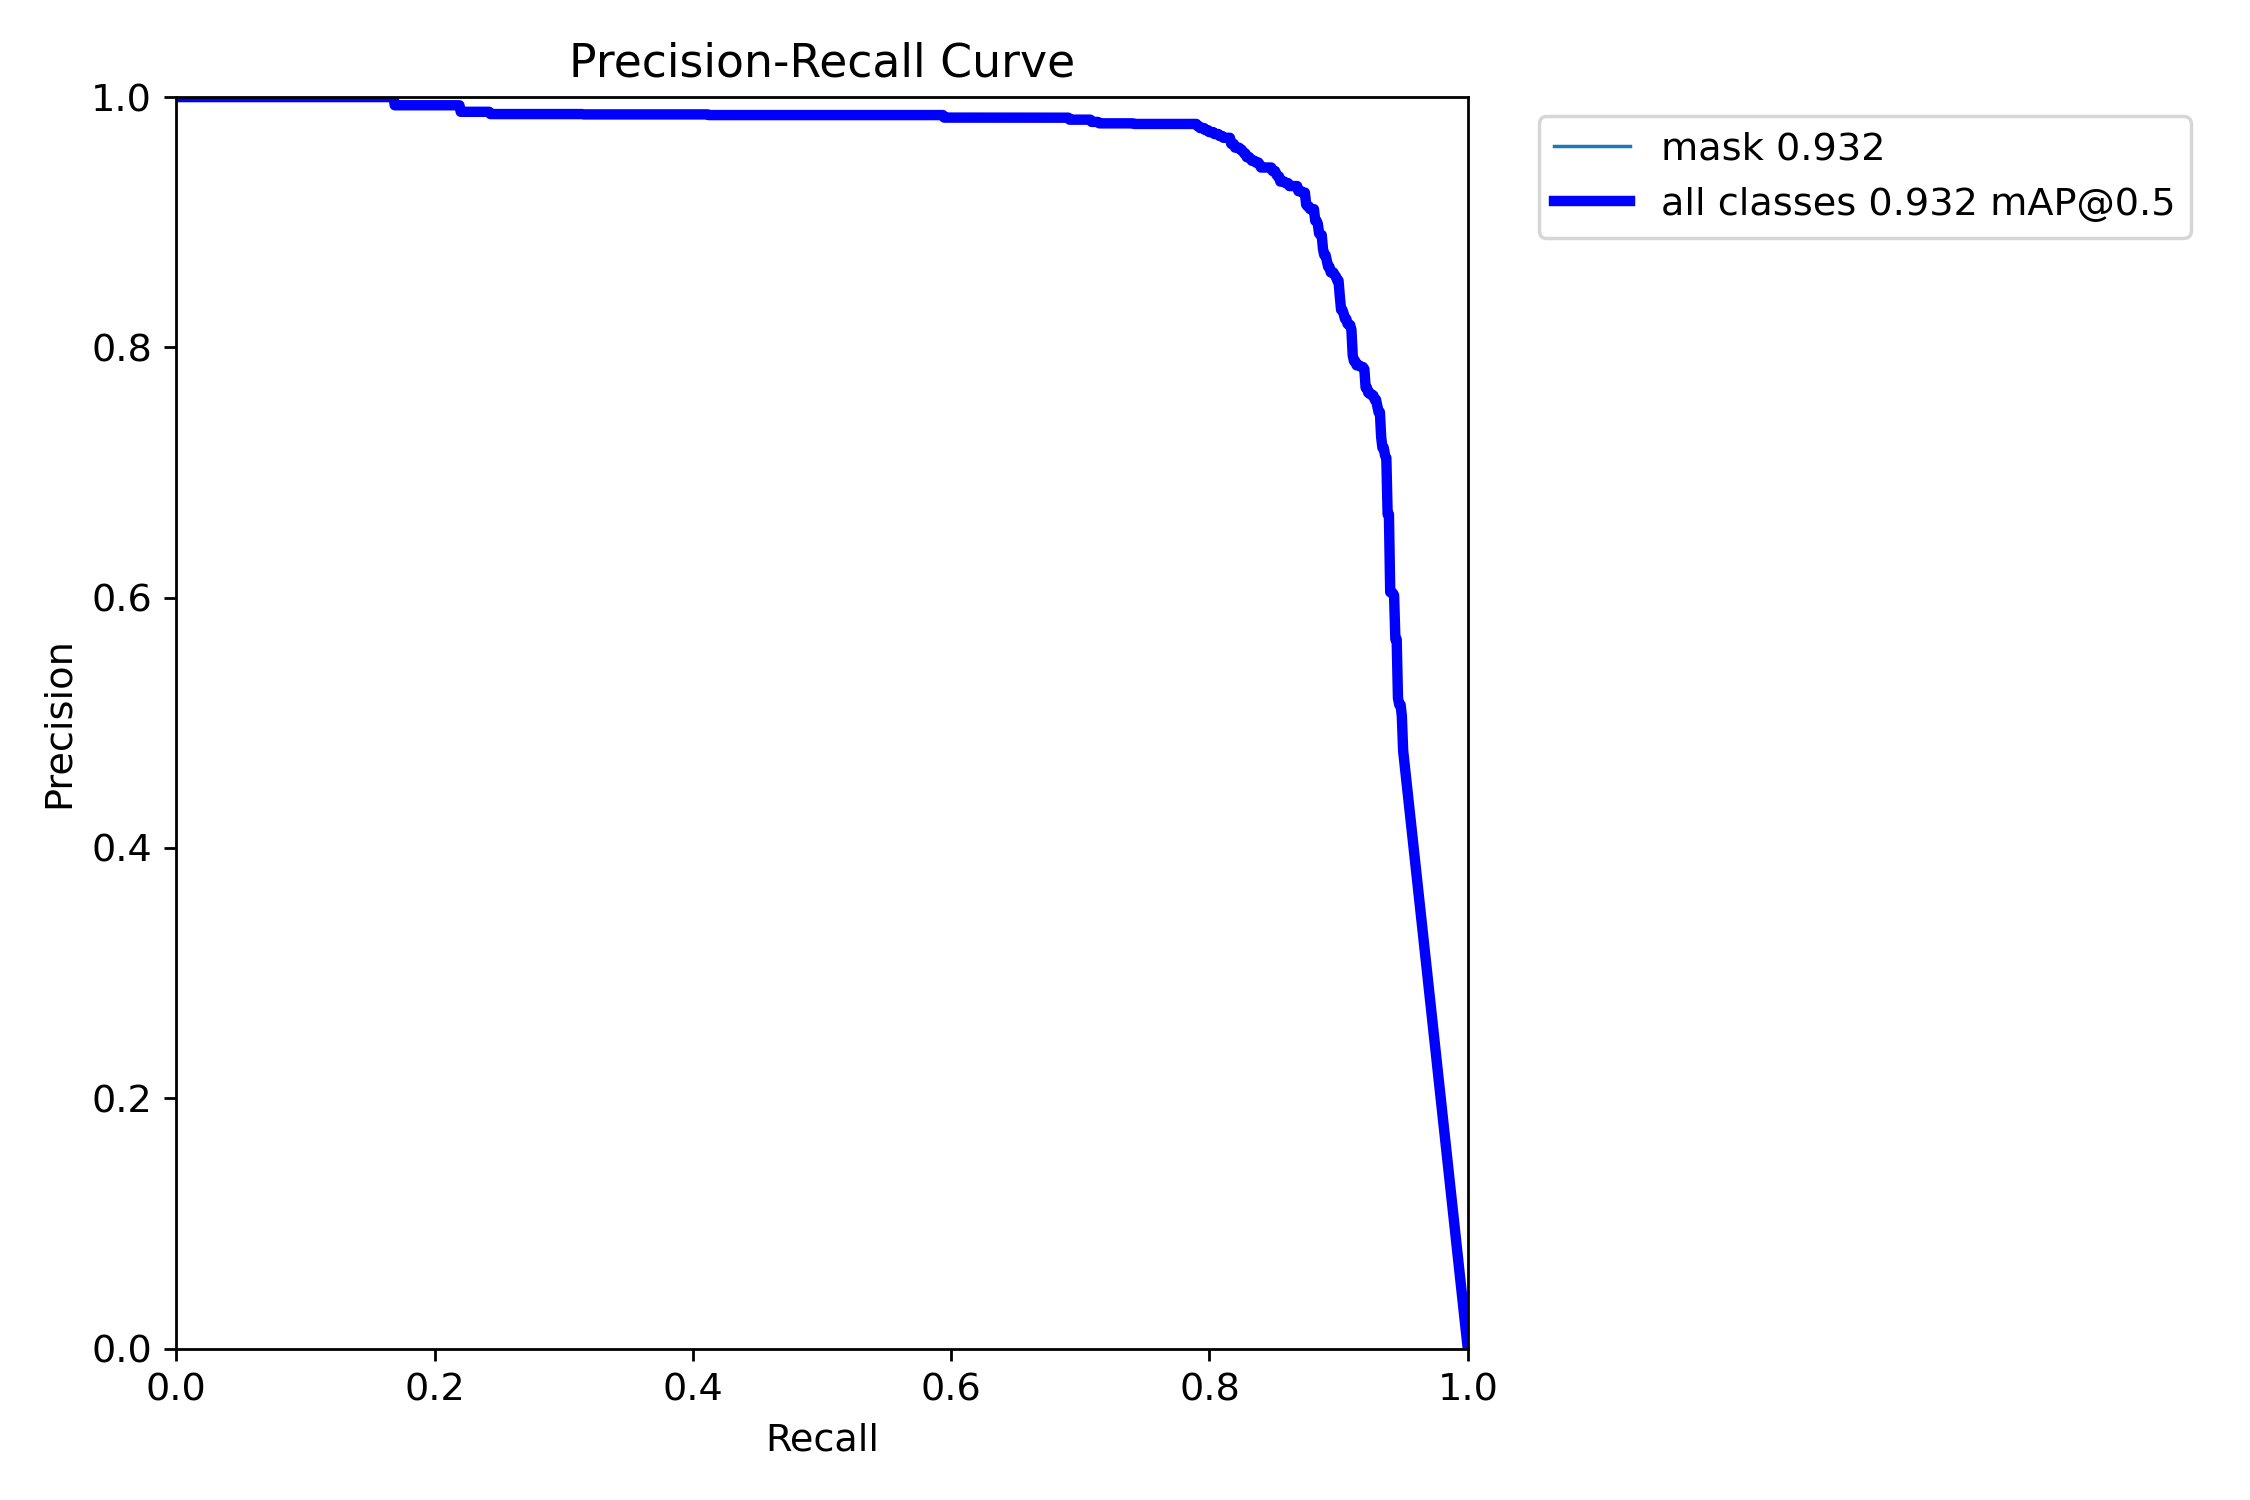

Results:


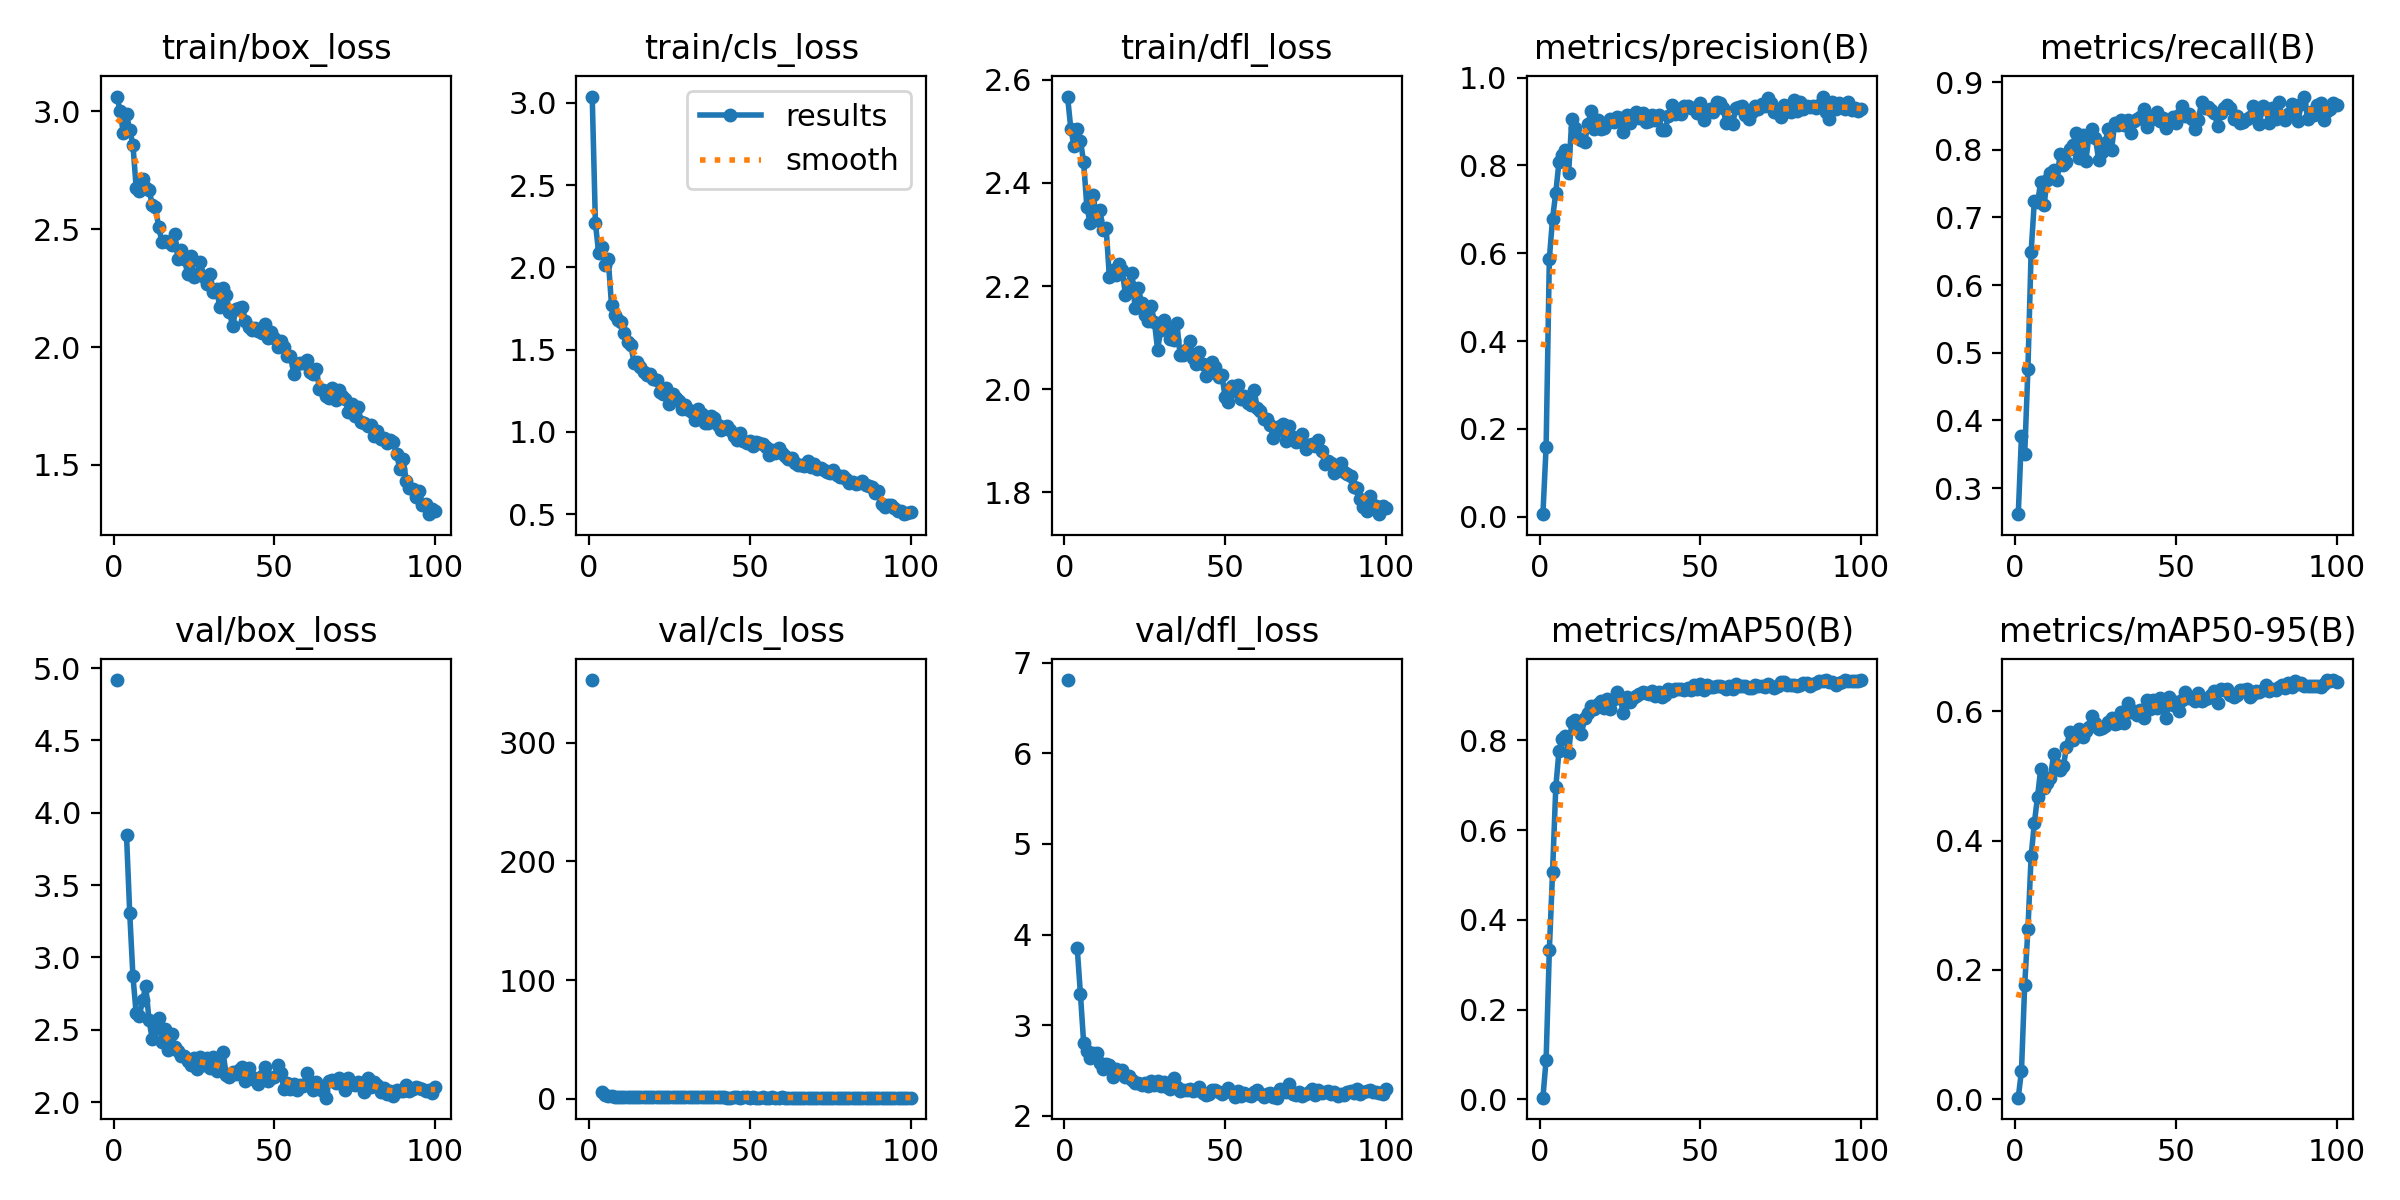

In [22]:
print("YOLO 재학습 결과\n")

# PR Curve 이미지 표시
pr_curve_path = "/content/runs/detect/train/PR_curve.png"  # 필요 시 경로를 수정하세요.
pr_curve_img = Image.open(pr_curve_path)
print("PR Curve:")
display(pr_curve_img)

# Results 이미지 표시
results_path = "/content/runs/detect/train/results.png"  # 필요 시 경로를 수정하세요.
results_img = Image.open(results_path)
print("Results:")
display(results_img)

# Step 2 :딥러닝 분류 모델

YOLO를 통해 마스크를 쓴 사람을 검출할 수 있고, 마스크를 쓴 사람 중, 마스크를 올바르게 썻는지를 판별하는 분류모델을 사용합니다. 최적의 분류 모델을 사용하기 위해 수업시간에 배운 NN모델, 전이학습 모델을 사용하여 가장 정확도가 높은 모델을 판별한 후, 성능을 개선하겠습니다.

https://www.kaggle.com/code/sahityasetu/face-mask-detection-ann-cnn-transfer-learning 를 참고하여 모델의 데이터셋 구성과 전이학습을 하였으며, 이외는 제가 직접 분석하였습니다.

1단계 : 라이브러리 임포트와 데이터셋 재구성